In [1]:
datos = ""
with open("salida.txt", "r") as archi:
    datos = archi.readlines()
    datos.sort()

In [2]:
for linea in datos:
    linea.removesuffix("\n")

In [3]:
def promediar(lista):
    #print(len(lista))
    return sum(lista)/len(lista)

In [4]:
lineaAnterior = datos[0].split(":")[0]
lista = []
datosPromediados = []
for linea in datos:
    #print(linea)
    if linea.split(":")[0] == lineaAnterior.split(":")[0]:
        tiempo = linea.split()
        tiempo = tiempo[::-1]
        lista.append(float(tiempo[0]))
        lineaAnterior = linea
    else:
        nueva = lineaAnterior[:lineaAnterior.find(":")+1]
        nueva += f" {promediar(lista)}"
        #print("\t", nueva)
        datosPromediados.append(nueva)
        lista.clear()
        tiempo = linea.split()
        tiempo = tiempo[::-1]
        lista.append(float(tiempo[0]))
        lineaAnterior = linea.split(":")[0]

nueva = lineaAnterior[:lineaAnterior.find(":")+1]
nueva += f" {promediar(lista)}"
#print("\t", nueva)
datosPromediados.append(nueva)

In [7]:
def extraerDatos(linea, dict):
    de = linea[3]
    a = linea[7]
    tiempo = float(linea[15:].removesuffix("\n"))
    dict["de"].append(de)
    dict["a"].append(a)
    dict["tiempo"].append(tiempo)

In [8]:
lista = []
info = {
    "de" : [],
    "a" : [],
    "tiempo" : []
}
for linea in datosPromediados:
    extraerDatos(linea, info)


In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(
    {
        "De" : info["de"],
        "A" : info["a"],
        "Tiempo" : info["tiempo"]
    }
)
df

,De,A,Tiempo
0,0,1,0.001480
1,0,2,0.002682
2,0,3,0.003845
3,0,4,0.004123
4,0,5,0.001361
5,1,0,0.000544
6,1,2,0.001585
7,1,3,0.005551
8,1,4,0.003698
9,1,5,0.002643


In [11]:
print("Promedio: ", df["Tiempo"].mean())
print("Desvío: ", df["Tiempo"].std())

Promedio:  0.0025087
Desvío:  0.0016186353191969228


In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

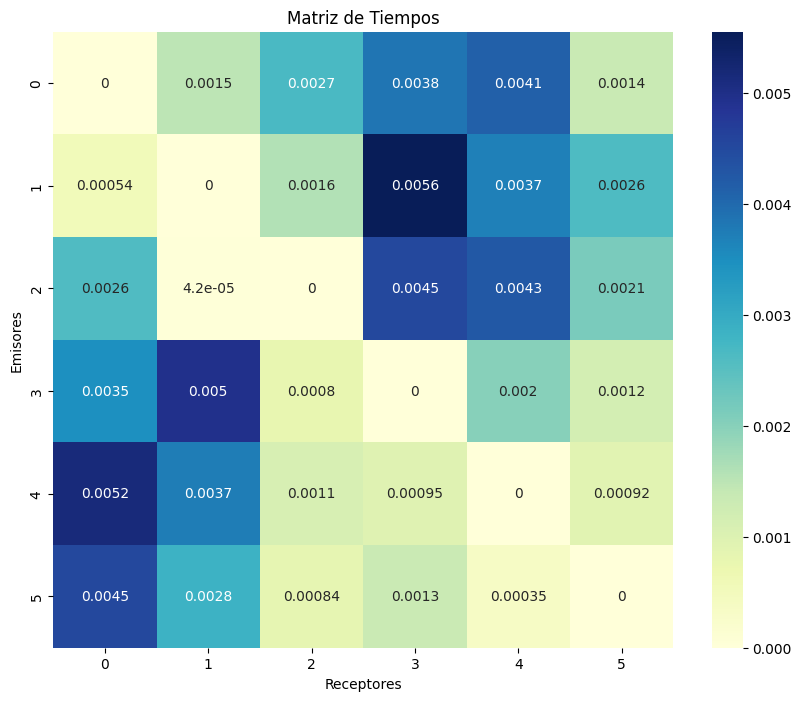

In [13]:
elementos = sorted(pd.concat([df["De"], df["A"]]).unique())
num = len(elementos)
matriz = np.zeros((num, num))

for _, row in df.iterrows():
    de_idx = elementos.index(row["De"])
    a_idx = elementos.index(row["A"])
    matriz[de_idx, a_idx] = row["Tiempo"]

plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap="YlGnBu", xticklabels=elementos, yticklabels=elementos)
plt.title("Matriz de Tiempos")
plt.xlabel("Receptores")
plt.ylabel("Emisores")
plt.savefig("salida/fig1ej2.png")
plt.show()